# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
diamonds = pd.read_csv('Cut_numbered.csv')

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,0,1,63.3,58.0,335,4.34,4.35,2.75


Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [6]:
diamonds.describe()

,carat,cut,color,clarity,depth,table,price,x,y
count,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,0.797879,2.771119,3.405789,3.051101,61.749336,57.457029,3932.136079,5.732007,5.735254
std,0.473986,1.265959,1.701165,1.647109,1.432514,2.234064,3988.734835,1.119670,1.140343
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000
25%,0.400000,1.000000,2.000000,2.000000,61.000000,56.000000,949.750000,4.710000,4.720000
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000
75%,1.040000,4.000000,5.000000,4.000000,62.500000,59.000000,5324.000000,6.540000,6.540000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000


In [ ]:
""""There is a big variation in price", it ranges from 326 to 18823, but it's clear the diamonds that are that expensive are rare
Also the mean and median differ quite a bit. """

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [ ]:
H0: carat has no influence on the price. 
H1: carat does have influence on price. 

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [16]:
diamonds.pivot_table(index=["color"], 
                     aggfunc={'price':np.mean, 'carat':np.mean, 'cut':np.mean, 'clarity':np.mean, 'table':np.mean})

,carat,clarity,cut,price,table
color,,,,,
0,1.162137,2.776353,2.599715,5323.818020,57.812393
1,1.026927,2.964035,2.748801,5091.874954,57.577278
2,0.911627,2.933871,2.741990,4484.958805,57.518176
3,0.771088,3.463419,2.864925,3998.145173,57.288060
4,0.736509,3.134605,2.754062,3725.091938,57.433148
5,0.657867,2.969889,2.744616,3076.752475,57.491201
6,0.657715,2.691025,2.801742,3168.106436,57.404355


**What do you see? Pay special attention to the relationship between price and color.**

In [ ]:
"""Looks like there is a linear relationship between price and color"""

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

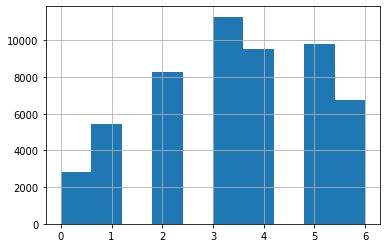

In [19]:
diamonds['color'].hist()

In [ ]:
""""I see the better the color is the higher the price, but it looks like that is not the only feature of importance""""

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [25]:
diamonds.groupby(['carat']).mean()

,cut,color,clarity,depth,table,price,x,y
carat,,,,,,,,
0.20,3.083333,5.166667,2.833333,61.100000,59.333333,365.166667,3.786667,3.753333
0.21,2.777778,5.444444,2.666667,60.511111,58.444444,380.222222,3.874444,3.837778
0.22,2.400000,4.800000,2.600000,61.620000,60.400000,391.400000,3.898000,3.848000
0.23,1.689420,4.518771,4.901024,61.426621,58.034130,486.143345,3.946382,3.973379
0.24,2.003937,4.185039,4.972441,61.599213,57.488189,505.185039,3.990157,4.019331
0.25,2.254717,4.146226,4.853774,61.565566,57.363208,550.924528,4.062500,4.086934
0.26,2.565217,3.928854,4.723320,61.677470,56.911858,550.897233,4.102688,4.124704
0.27,2.609442,4.047210,4.729614,61.599142,56.778970,574.759657,4.159142,4.181588
0.28,2.419192,3.898990,4.727273,61.526263,56.863636,580.121212,4.207172,4.233687


In [ ]:
""""Looking for all the values in carat is quite messy but the trend is the higher the price the higher the carat."""


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

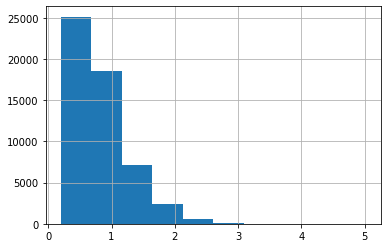

In [26]:
diamonds['carat'].hist()

In [ ]:
""""The last values are disapering while there is a huge difference in price."""

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [28]:
diamonds.groupby(['table']).mean()

,carat,cut,color,clarity,depth,price,x,y
table,,,,,,,,
43.0,1.040000,4.000000,1.000000,4.000000,62.900000,4997.000000,6.450000,6.410000
44.0,0.290000,1.000000,5.000000,4.000000,62.800000,474.000000,4.200000,4.240000
49.0,0.650000,0.000000,3.000000,3.000000,64.250000,2290.500000,5.355000,5.320000
50.0,1.510000,0.000000,3.000000,2.000000,61.500000,8995.500000,7.380000,7.295000
50.1,0.940000,0.000000,2.000000,1.000000,66.000000,3353.000000,6.130000,6.170000
51.0,0.883333,1.666667,3.222222,2.666667,63.300000,4063.666667,5.995556,5.941111
51.6,2.000000,1.000000,0.000000,4.000000,61.000000,13203.000000,8.140000,8.180000
52.0,0.871071,2.178571,3.517857,2.892857,62.833929,4342.000000,5.877143,5.870179
52.4,0.500000,4.000000,4.000000,4.000000,62.500000,1679.000000,5.070000,5.110000


In [ ]:
"""The table values are quite different, I cant see a pattern here"""

**Finally, do the same with the `clarity` column.**

In [27]:
diamonds.groupby(['clarity']).mean()

,carat,cut,color,depth,table,price,x,y
clarity,,,,,,,,
0,1.283846,1.990553,2.968961,62.734278,58.303779,3924.168691,6.761093,6.709379
1,1.077602,2.556039,3.469967,61.771567,57.926823,5062.267356,6.404157,6.399890
2,0.850482,2.618676,3.448450,61.853042,57.662541,3996.001148,5.888383,5.888256
3,0.763850,2.847340,3.494370,61.724249,57.418040,3924.166204,5.658633,5.659782
4,0.727108,2.863403,3.161812,61.667968,57.313966,3839.144308,5.572860,5.582512
5,0.596202,2.929530,3.569483,61.663778,57.024990,3283.737071,5.218454,5.232118
6,0.503131,3.063492,3.350848,61.624521,56.883881,2519.512315,4.961721,4.976437
7,0.505123,3.322905,3.101676,61.510615,56.507207,2864.839106,4.968402,4.989827


In [ ]:
"""The best clarity doens't seem to be the most expensive diamond of this data set."""

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [ ]:
"""it looks like carat and clarity are of big importance, it does match my starting hypothesis"""

# 4. Taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


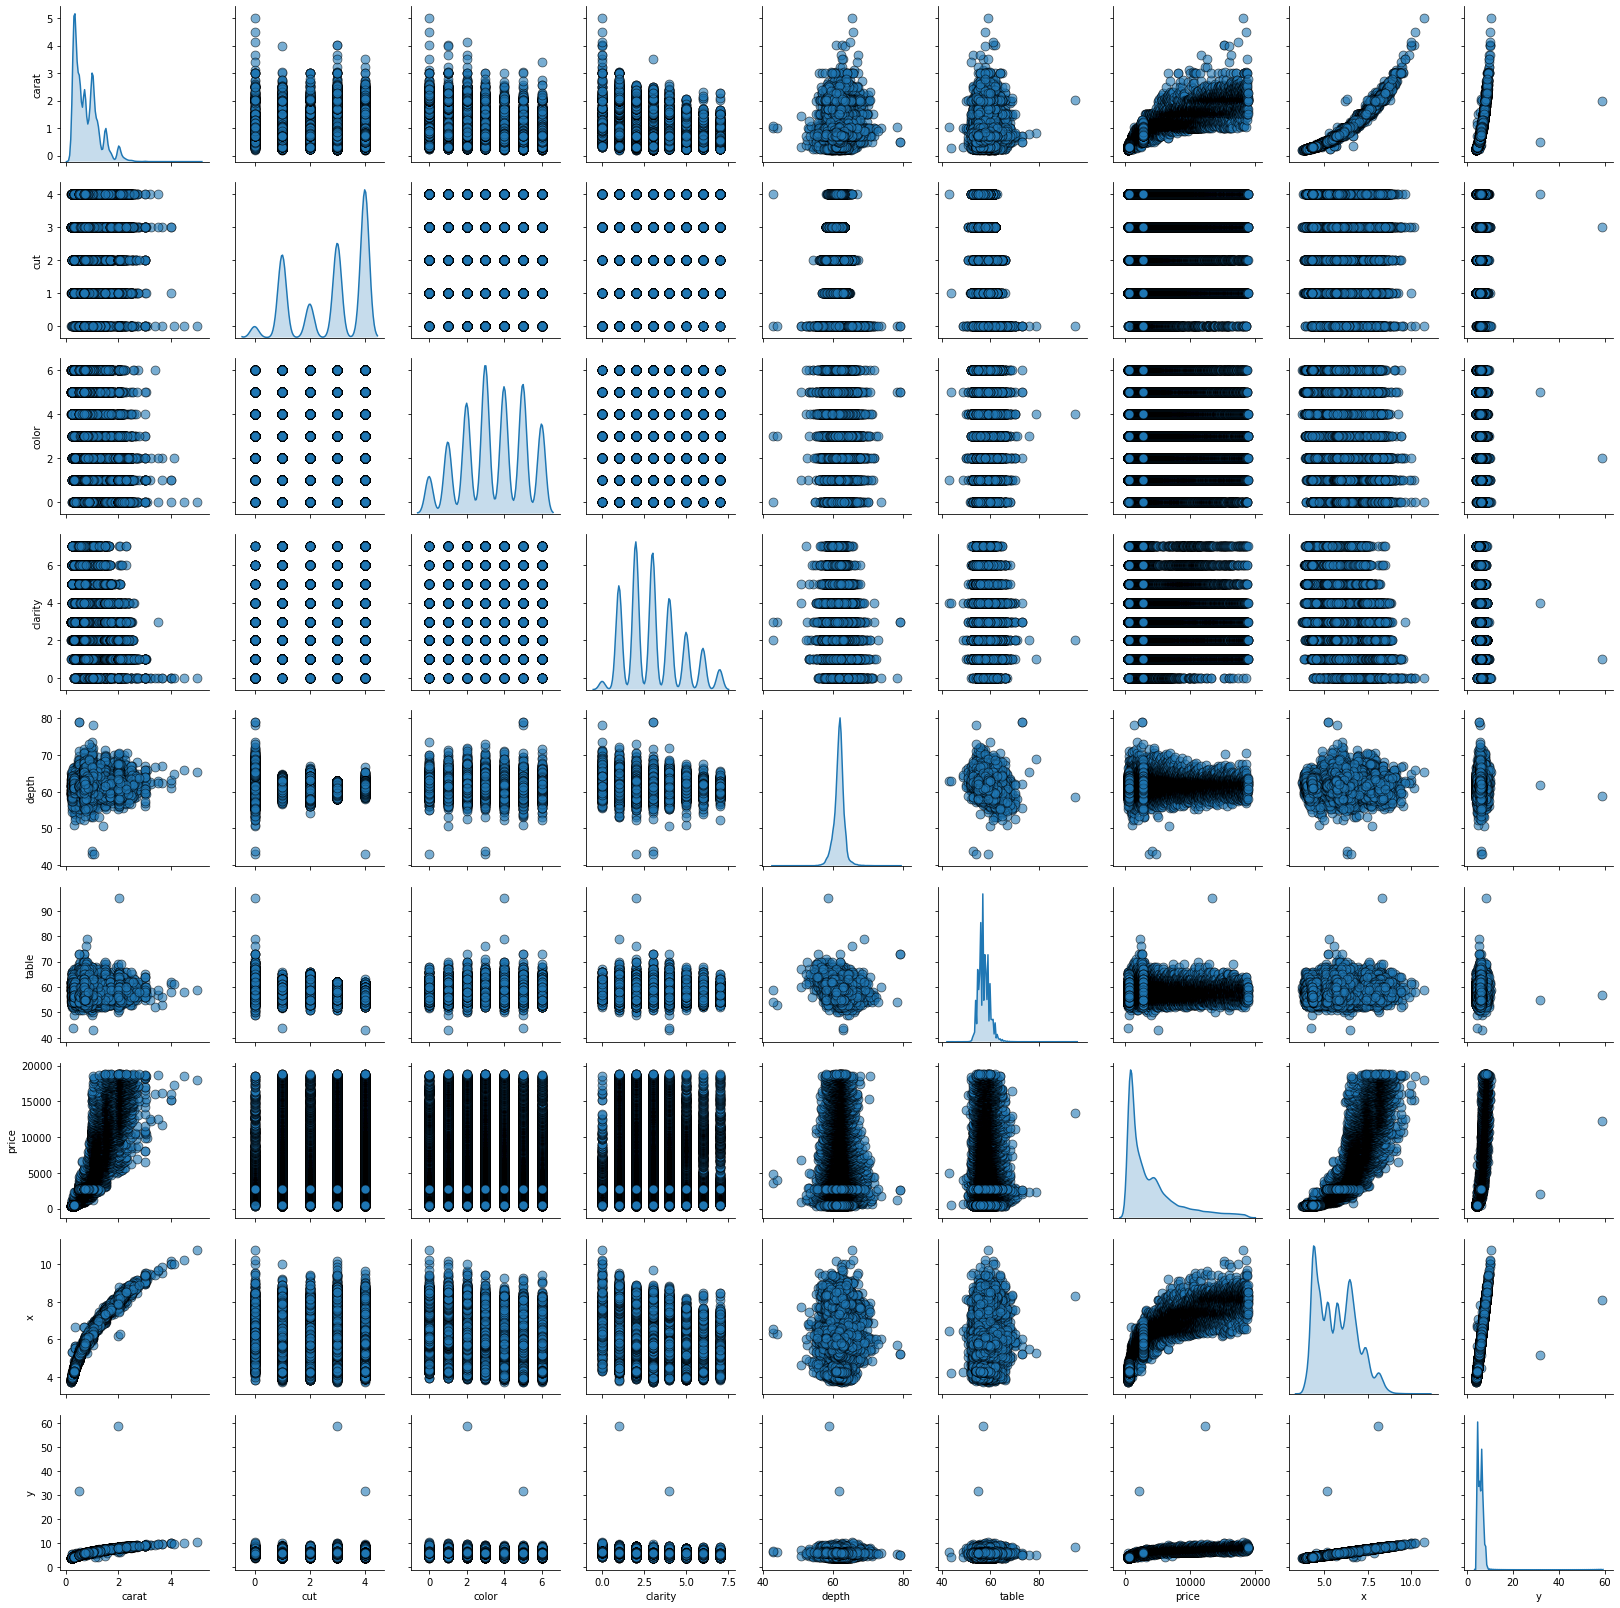

In [29]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [ ]:
#your thoughts here

""""Price and carrat are interesting, and apparently the dimentions (x,y,z) are of influence too. I would look into the dimention of x""

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

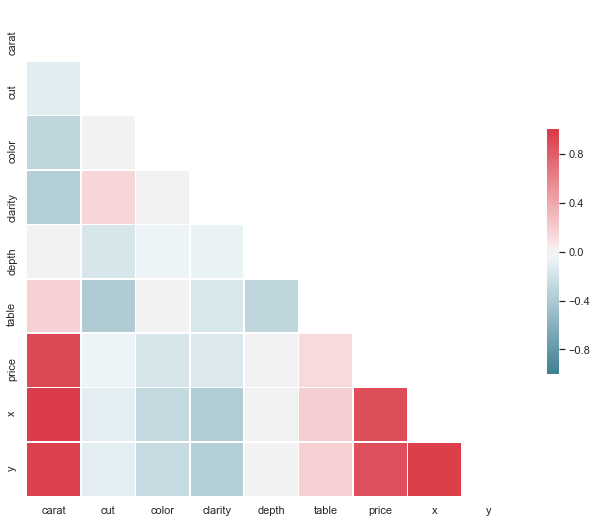

In [30]:
sns.set(style="white")

corr = diamonds.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin= -1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**What do you see here? Regarding the results before, does it fit with them?**

In [ ]:
"""Price and carrat have a strong positive relation, just like price and x and y"""
"""""cut and table like carat and clarity have a bit of a negative relationship """"

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

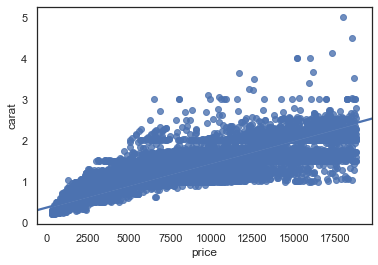

In [35]:
sns.regplot(x='price', y='carat', data=diamonds)

In [33]:
X = diamonds["price"]
Y = diamonds["carat"]

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)  
slope, intercept, r_value, p_value, std_err

(0.00010951600053899113,
 0.3672475496882973,
 0.9216104923341861,
 0.0,
 1.9859879255642394e-07)

**What do you think?**

In [34]:
"""There is a relation but whil eit is 92, but I have to say that I think that the outliers in price are a important
factor in that"""


,price,carat
price,1.00000,0.92161
carat,0.92161,1.00000


**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [36]:
X = diamonds["cut"]
Y = diamonds["table"]

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)  
slope, intercept, r_value, p_value, std_err

(-0.674017293087084,
 59.324811475310604,
 -0.38194003787124353,
 0.0,
 0.007022965702750747)

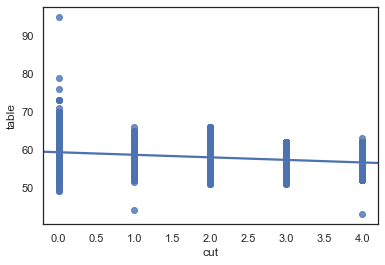

In [37]:
sns.regplot(x='cut', y='table', data=diamonds)

In [ ]:
"""Cut an table seem to have a negative relationship, and I would talk to a diamond expert to see why the x and y 
dimentions are that important. ""

**Conlcusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.